In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import svm

%matplotlib inline
# %pylab inline

In [36]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

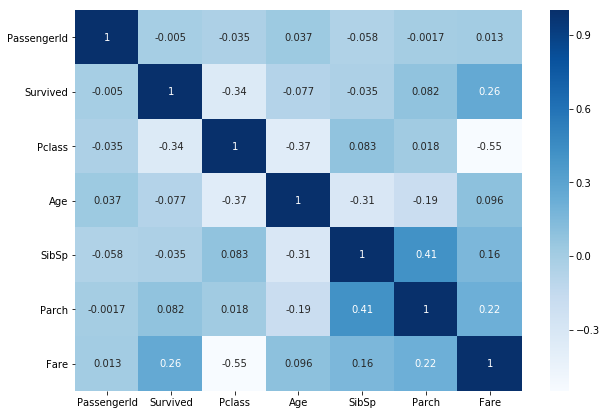

In [3]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(), annot=True, cmap="Blues")

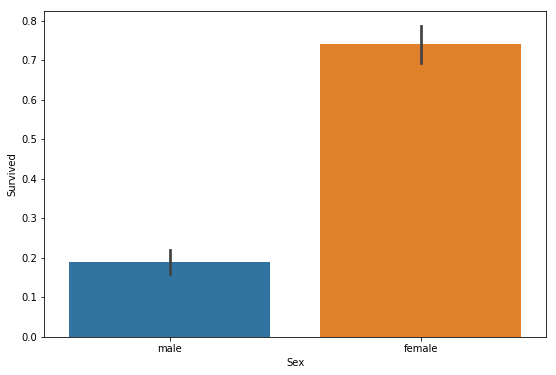

In [4]:
plt.figure(figsize=(9,6))
sns.barplot(x='Sex', y='Survived', data= train)

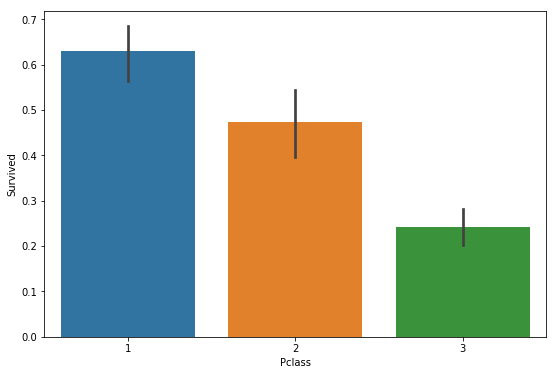

In [5]:
plt.figure(figsize=(9,6))
sns.barplot(x='Pclass', y='Survived', data=train)

In [37]:
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [38]:
def transf(valor):
        if valor == 'female':
            return 1
        else:
            return 0

train['Sex'] = train['Sex'].map(transf)
test['Sex'] = test['Sex'].map(transf)

In [39]:
media = np.int(train['Age'].median())
train['Age'] = train['Age'].fillna(media)
test['Age'] = test['Age'].fillna(media)

In [40]:
train['Embarked'] = train['Embarked'].replace({'S':0, 'C':1, 'Q':2})
train['Embarked'] = train['Embarked'].fillna(10)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [41]:
x = train.drop(['Survived'], axis=1 )
y = train['Survived']

In [42]:
resul = []

kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_test in kf.split(x):

    x_treino, x_valid = x.iloc[linhas_treino], x.iloc[linhas_test]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_test]

    modelo = DecisionTreeClassifier(max_depth=2)
    modelo.fit(x_treino, y_treino)

    p = modelo.predict(x_valid)

    acc = np.mean(y_valid == p)
    
    resul.append(acc)
    print("Acuracia: ", acc)

Acuracia:  0.8004484304932735
Acuracia:  0.7573033707865169
Acuracia:  0.7937219730941704
Acuracia:  0.7662921348314606
Acuracia:  0.7802690582959642
Acuracia:  0.7730337078651686
Acuracia:  0.7892376681614349
Acuracia:  0.7640449438202247
Acuracia:  0.7847533632286996
Acuracia:  0.7842696629213484
Acuracia:  0.7802690582959642
Acuracia:  0.7887640449438202
Acuracia:  0.7959641255605381
Acuracia:  0.7640449438202247
Acuracia:  0.7802690582959642
Acuracia:  0.7820224719101123
Acuracia:  0.7937219730941704
Acuracia:  0.7752808988764045
Acuracia:  0.7825112107623319
Acuracia:  0.7887640449438202


In [43]:
np.mean(resul)

0.7812493072000806

In [44]:
ols = LinearRegression()
ols.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [45]:
ols_params = {'fit_intercept':[True, False],
              'normalize':[True, False]}
metricas = ['explained_variance', 'neg_mean_absolute_error', 
            'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'r2']

In [46]:
clf = GridSearchCV(ols, param_grid=ols_params, 
                   scoring=metricas, verbose=100, refit='r2', return_train_score=False)

In [ ]:
ac_decision = round(accuracy_score(x_train, x_test) *100,2)
print(ac_decision)

In [ ]:
x_valid_check = train.iloc[linhas_test].copy()
x_valid_check['p'] = p
x_valid_check[['Survived', 'p']].head()

In [ ]:
modelo.fit(x,y)

In [ ]:
p_class = modelo.predict(test[vari].fillna(-1))

In [ ]:
tree_sub = pd.Series(p_class, index= test['PassengerId'], name='Survived')
tree_sub.to_csv("modelo_dectree2.csv", header=True)